In [1]:
from math import log, exp, log10
import pandas as pd
import nltk
from n_gram import *
import matplotlib.pyplot as plt

Importing and Processing the Test and Train Data

In [2]:
filepath = "Dataset/Training/train_data.csv"
df_train = pd.read_csv(filepath)
df_train.size

263000

In [3]:
filepath = "Dataset/Testing/test_data.csv"
df_test = pd.read_csv(filepath)
df_test.size

65750

In [4]:
# Train Corpus
train_corpus = {} 
sentence_id = 0
for sentence in df_train['Value']:
    tokenized_sentence = []
    tokens = nltk.word_tokenize(sentence)
    tokens = (token for token in tokens if token.isalpha())
    tokenized_sentence += tokens
    train_corpus[sentence_id] = tokenized_sentence
    sentence_id += 1

In [5]:
# Test Corpus
test_corpus = {} 
sentence_id = 0
for sentence in df_test['Value']:
    tokenized_sentence = []
    tokens = nltk.word_tokenize(sentence)
    tokens = (token for token in tokens if token.isalpha())
    tokenized_sentence += tokens
    test_corpus[sentence_id] = tokenized_sentence
    sentence_id += 1

In [6]:
# Defining Vocabulary

Vocab = vocabulary(train_corpus, test_corpus)
V = len(Vocab)

Unigram Model with Add-k Smoothing for vaues of k varied from 0.1 to 1.5

Unigram model with Add-k smoothing gives best results for k = 9.61  with perplexity: 1090.37671485695


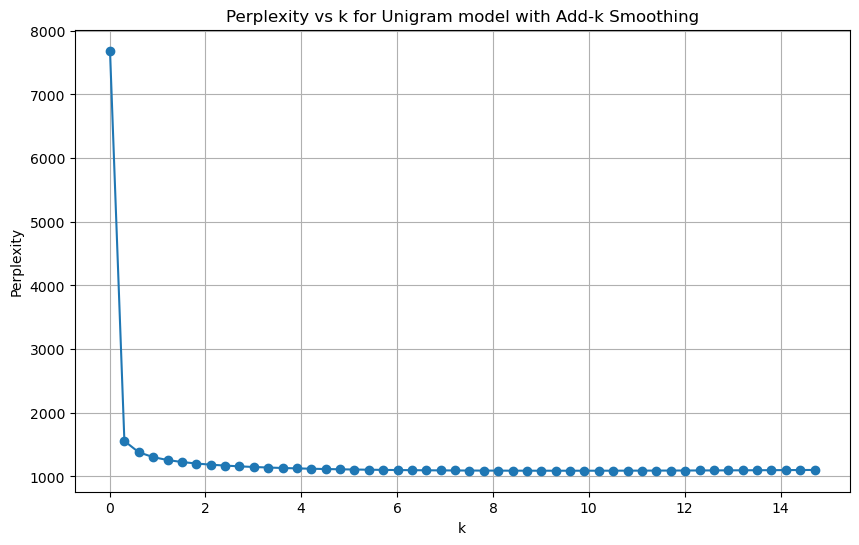

In [17]:
prob_unigram_sm_addk={}
pp_unigram_sm_addk={}
k_id = 0
k_min = 0
pp_min = 1000000000
for i in range(1,1500,30):
    k = i/100
    prob_unigram_sm_addk[k_id] = train_n_gram(train_corpus, 1, vocab = V, smoothing=True,how='Add_k',k=k)
    _,pp_unigram_sm_addk[k_id] = test_n_gram(test_data=test_corpus,n=1, prob_words=prob_unigram_sm_addk[k_id], Vocabulary=V, smoothing=True, how='Add_k', k=k, processed_corpus=train_corpus)
    # print("Perplexity for Unigram model with Add-k smoothing for k =", k, ":", pp_unigram_sm_addk[k_id])
    if(pp_unigram_sm_addk[k_id]<pp_min):
        pp_min = pp_unigram_sm_addk[k_id]
        k_min = k
    k_id+=1
print("Unigram model with Add-k smoothing gives best results for k =", k_min, " with perplexity:", pp_min)
unigram_ks = [i/100 for i in range(1, 1500, 30)]
unigram_perplexities = [pp_unigram_sm_addk[k_id] for k_id in range(len(unigram_ks))]

# Plot pp_bigram_sm_addk vs k
plt.figure(figsize=(10, 6))
plt.plot(unigram_ks, unigram_perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs k for Unigram model with Add-k Smoothing')
plt.xlabel('k')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()

Bigram Model with Add-k Smoothing for values of k varied from 0.01 to 1.5

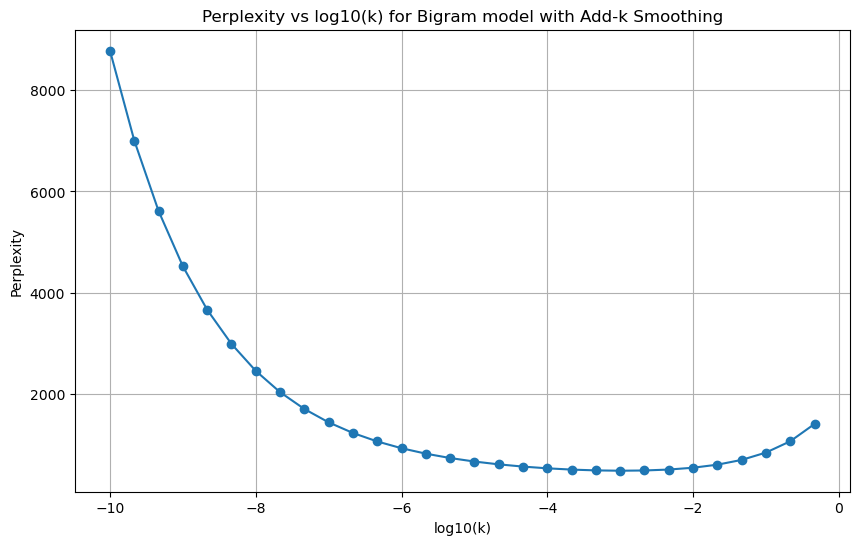

In [18]:
prob_bigram_sm_addk={}
pp_bigram_sm_addk={}
k_id = 0
for i in range(0,150,5):
    log_k = -10+i/15
    k = pow(10, log_k)
    prob_bigram_sm_addk[k_id] = train_n_gram(train_corpus, 2, vocab = V, smoothing=True,how='Add_k',k=k)
    _,pp_bigram_sm_addk[k_id] = test_n_gram(test_data=test_corpus,n=2, prob_words=prob_bigram_sm_addk[k_id], Vocabulary=V, smoothing=True, how='Add_k', k=k, processed_corpus=train_corpus)
    # print("Perplexity for Unigram model with Add-k smoothing for k =", k, ":", pp_unigram_sm_addk[k_id])
    k_id+=1

bigram_ks = [-10+i/15 for i in range(0, 150, 5)]
bigram_perplexities = [pp_bigram_sm_addk[k_id] for k_id in range(len(bigram_ks))]

# Plot pp_bigram_sm_addk vs k
plt.figure(figsize=(10, 6))
plt.plot(bigram_ks, bigram_perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs log10(k) for Bigram model with Add-k Smoothing')
plt.xlabel('log10(k)')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()

Bigram model with Add-k smoothing gives best results for k = 0.001  with perplexity: 480.40426865378635


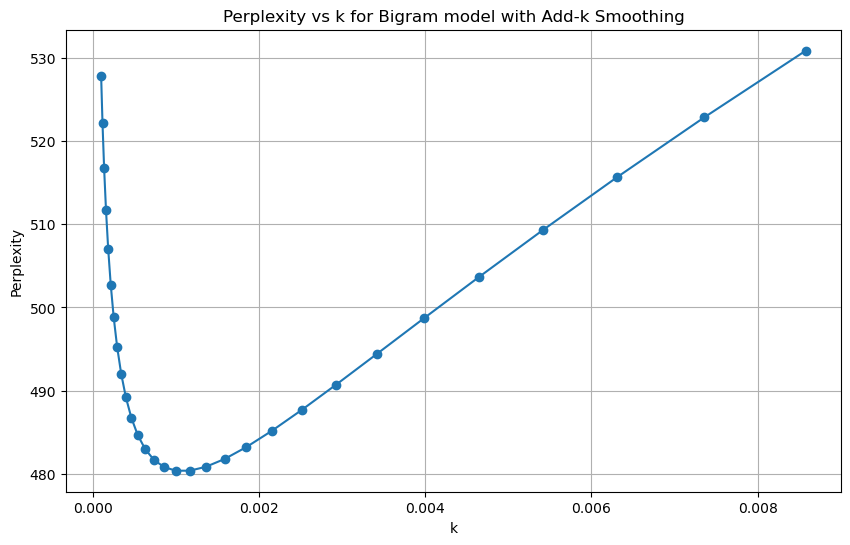

In [19]:
prob_bigram_sm_addk={}
pp_bigram_sm_addk={}
k_id = 0
k_min = 0
pp_min = 1000000000
for i in range(0,150,5):
    log_k = -4+i*2/150
    k = pow(10, log_k)
    prob_bigram_sm_addk[k_id] = train_n_gram(train_corpus, 2, vocab = V, smoothing=True,how='Add_k',k=k)
    _,pp_bigram_sm_addk[k_id] = test_n_gram(test_data=test_corpus,n=2, prob_words=prob_bigram_sm_addk[k_id], Vocabulary=V, smoothing=True, how='Add_k', k=k, processed_corpus=train_corpus)
    # print("Perplexity for Unigram model with Add-k smoothing for k =", k, ":", pp_unigram_sm_addk[k_id])
    if(pp_bigram_sm_addk[k_id]<pp_min):
        pp_min = pp_bigram_sm_addk[k_id]
        k_min = k
    k_id+=1
print("Bigram model with Add-k smoothing gives best results for k =", k_min, " with perplexity:", pp_min)
bigram_ks = [pow(10,-4+i*2/150) for i in range(0, 150, 5)]
bigram_perplexities = [pp_bigram_sm_addk[k_id] for k_id in range(len(bigram_ks))]

# Plot pp_bigram_sm_addk vs k
plt.figure(figsize=(10, 6))
plt.plot(bigram_ks, bigram_perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs k for Bigram model with Add-k Smoothing')
plt.xlabel('k')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()

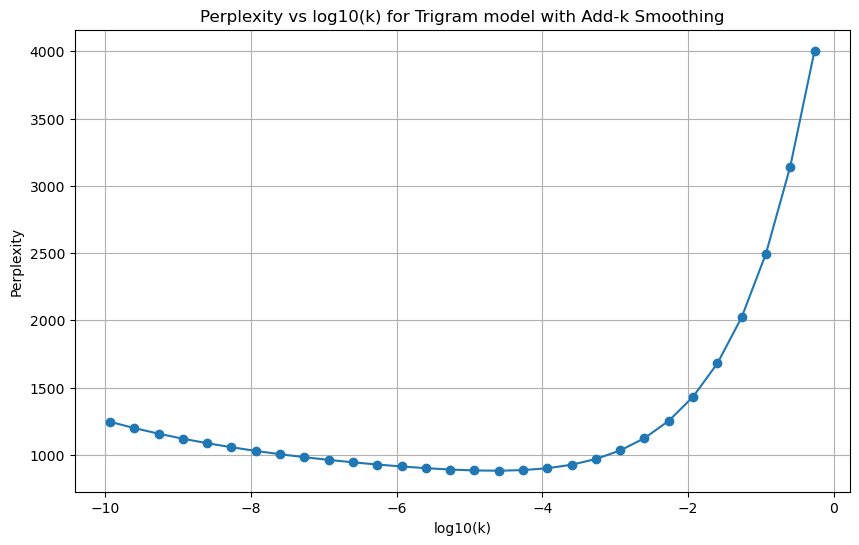

In [21]:
prob_trigram_sm_addk={}
pp_trigram_sm_addk={}
k_id = 0
for i in range(1,150,5):
    log_k = -10+i/15
    k = pow(10,log_k)
    prob_trigram_sm_addk[k_id] = train_n_gram(train_corpus, 3, vocab = V, smoothing=True,how='Add_k',k=k)
    _,pp_trigram_sm_addk[k_id] = test_n_gram(test_data=test_corpus,n=3, prob_words=prob_trigram_sm_addk[k_id], Vocabulary=V, smoothing=True, how='Add_k', k=k, processed_corpus=train_corpus)
    # print("Perplexity for Unigram model with Add-k smoothing for k =", k, ":", pp_unigram_sm_addk[k_id])
    k_id+=1

trigram_ks = [-10+i/15 for i in range(1, 150, 5)]
trigram_perplexities = [pp_trigram_sm_addk[k_id] for k_id in range(len(trigram_ks))]

# Plot pp_tigram_sm_addk vs k
plt.figure(figsize=(10, 6))
plt.plot(trigram_ks, trigram_perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs log10(k) for Trigram model with Add-k Smoothing')
plt.xlabel('log10(k)')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()


Trigram model with Add-k smoothing gives best results for k = 2.290867652767775e-05  with perplexity: 881.7822070571714


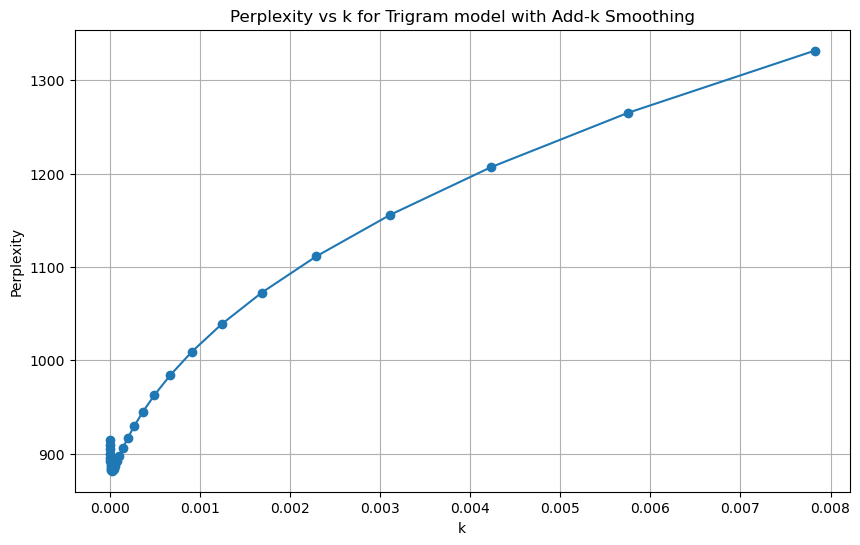

In [22]:
prob_trigram_sm_addk={}
pp_trigram_sm_addk={}
k_id = 0
pp_min = 1000000000
k_min = 0
for i in range(1,150,5):
    log_k = -6+i*4/150
    k = pow(10,log_k)
    prob_trigram_sm_addk[k_id] = train_n_gram(train_corpus, 3, vocab = V, smoothing=True,how='Add_k',k=k)
    _,pp_trigram_sm_addk[k_id] = test_n_gram(test_data=test_corpus,n=3, prob_words=prob_trigram_sm_addk[k_id], Vocabulary=V, smoothing=True, how='Add_k', k=k, processed_corpus=train_corpus)
    # print("Perplexity for Unigram model with Add-k smoothing for k =", k, ":", pp_unigram_sm_addk[k_id])
    if(pp_trigram_sm_addk[k_id]<pp_min):
        pp_min = pp_trigram_sm_addk[k_id]
        k_min = k
    k_id+=1
print("Trigram model with Add-k smoothing gives best results for k =", k_min, " with perplexity:", pp_min)
trigram_ks = [pow(10, -6+i*4/150) for i in range(1, 150, 5)]
trigram_perplexities = [pp_trigram_sm_addk[k_id] for k_id in range(len(trigram_ks))]

# Plot pp_tigram_sm_addk vs k
plt.figure(figsize=(10, 6))
plt.plot(trigram_ks, trigram_perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs k for Trigram model with Add-k Smoothing')
plt.xlabel('k')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()


Quadgram Model

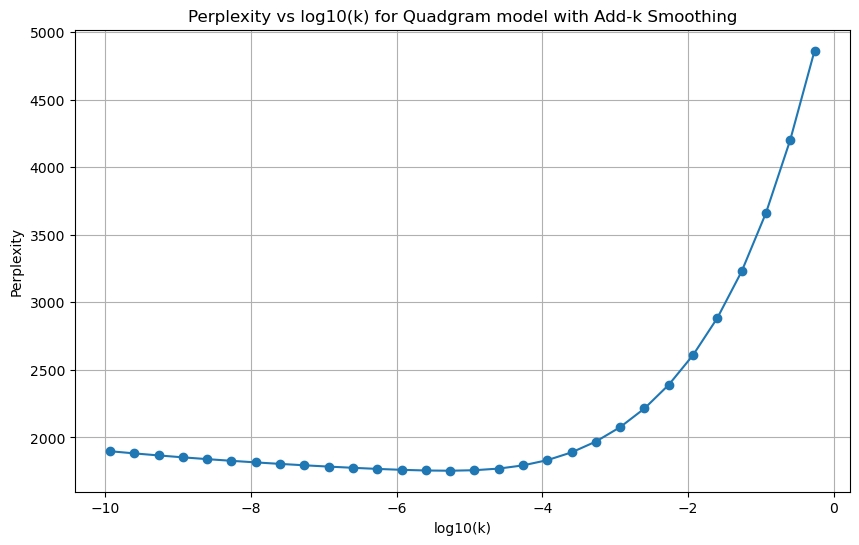

In [23]:
prob_quadgram_sm_addk={}
pp_quadgram_sm_addk={}
k_id = 0
for i in range(1,150,5):
    log_k = -10+i/15
    k = pow(10,log_k)
    prob_quadgram_sm_addk[k_id] = train_n_gram(train_corpus, 4, vocab = V, smoothing=True,how='Add_k',k=k)
    _,pp_quadgram_sm_addk[k_id] = test_n_gram(test_data=test_corpus,n=4, prob_words=prob_quadgram_sm_addk[k_id], Vocabulary=V, smoothing=True, how='Add_k', k=k, processed_corpus=train_corpus)
    # print("Perplexity for Unigram model with Add-k smoothing for k =", k, ":", pp_unigram_sm_addk[k_id])
    k_id+=1

quadgram_ks = [-10+i/15 for i in range(1, 150, 5)]
quadgram_perplexities = [pp_quadgram_sm_addk[k_id] for k_id in range(len(quadgram_ks))]

# Plot pp_tigram_sm_addk vs k
plt.figure(figsize=(10, 6))
plt.plot(quadgram_ks, quadgram_perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs log10(k) for Quadgram model with Add-k Smoothing')
plt.xlabel('log10(k)')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()


Quadgram model with Add-k smoothing gives best results for k = 5.011872336272725e-06  with perplexity: 1753.4456225846682


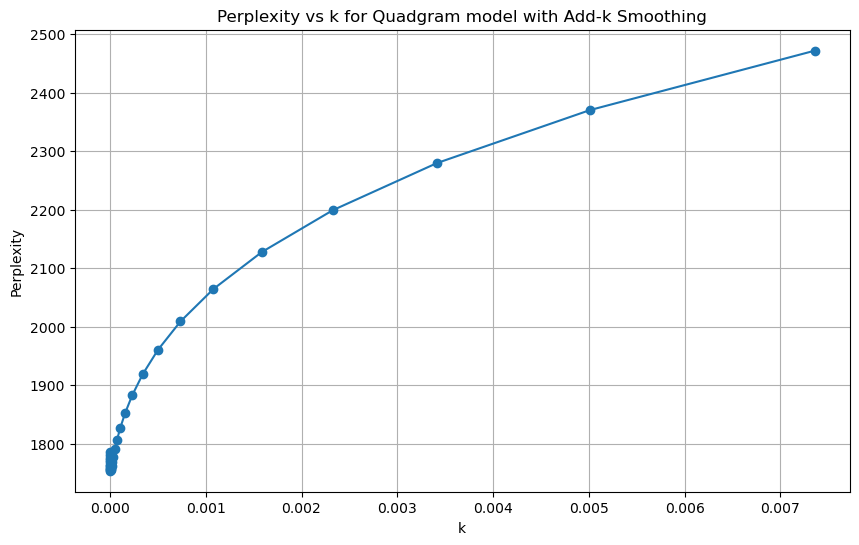

In [24]:
prob_quadgram_sm_addk={}
pp_quadgram_sm_addk={}
k_id = 0
pp_min = 1000000000
k_min = 0
for i in range(1,150,5):
    log_k = -7+i*5/150
    k = pow(10,log_k)
    prob_quadgram_sm_addk[k_id] = train_n_gram(train_corpus, 4, vocab = V, smoothing=True,how='Add_k',k=k)
    _,pp_quadgram_sm_addk[k_id] = test_n_gram(test_data=test_corpus,n=4, prob_words=prob_quadgram_sm_addk[k_id], Vocabulary=V, smoothing=True, how='Add_k', k=k, processed_corpus=train_corpus)
    if(pp_quadgram_sm_addk[k_id]<pp_min):
        pp_min = pp_quadgram_sm_addk[k_id]
        k_min = k
    # print("Perplexity for Unigram model with Add-k smoothing for k =", k, ":", pp_unigram_sm_addk[k_id])
    k_id+=1
print("Quadgram model with Add-k smoothing gives best results for k =", k_min, " with perplexity:", pp_min)
quadgram_ks = [pow(10, -7+i*5/150) for i in range(1, 150, 5)]
quadgram_perplexities = [pp_quadgram_sm_addk[k_id] for k_id in range(len(quadgram_ks))]

# Plot pp_tigram_sm_addk vs k
plt.figure(figsize=(10, 6))
plt.plot(quadgram_ks, quadgram_perplexities, marker='o', linestyle='-')
plt.title('Perplexity vs k for Quadgram model with Add-k Smoothing')
plt.xlabel('k')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()
